<a href="https://colab.research.google.com/github/Aesop-programmer/ML/blob/main/train_iot_malware_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import lightgbm as lgb

In [4]:
import pandas as pd

In [5]:
cd drive/MyDrive/

/content/drive/MyDrive


In [6]:
data_file= "one_hot.xlsx"

In [7]:
df = pd.read_excel(data_file)

In [8]:
feature = df.drop(["Unnamed: 219"],axis=1)

In [9]:
feature = feature.drop(["label"],axis=1)

In [10]:
target = pd.read_excel(data_file,usecols=[0])

In [11]:
malware_list=["gafgyt","tsunami","mirai"]

In [12]:
for i in range(56800):
  if(target.iat[i,0] not in malware_list):
    target.at[i,"label"] = "others"

In [13]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
target["label"] = labelencoder.fit_transform(target['label'])
print(target)

       label
0          1
1          0
2          0
3          0
4          1
...      ...
56795      2
56796      3
56797      2
56798      1
56799      1

[56800 rows x 1 columns]


In [14]:
one_hot_feature = pd.get_dummies(feature)
pd.DataFrame(one_hot_feature)

,androidMal,static,stripped,fcns_counts,libc.so.0,libc.so.6,libm.so,libdl.so,liblog.so,libc.so,libstdc++.so,sleep,_start,getpid,close,exit,time,memset,connect,read,strlen,socket,inet_addr,kill,open,free,fork,__errno_location,strcpy,write,select,malloc,abort,atoi,memcpy,execve,__pthread_return_void,raise,__GI_strchr,__GI_inet_addr,...,sclose,makeRandomStr,__pthread_mutex_trylock,__encode_header,fseeko,__GI_execl,wcsnrtombs,__GI_strtok_r,__stdio_init_mutex,__libc_write,__GI_socket,__libc_system,fseeko64,vsnprintf,__GI_strtok,__GI_close,__sigdelset,matchPrompt,architecture_AMD,architecture_MIPS,architecture_Motorola,architecture_PowerPC,architecture_SPARC,architecture_SuperH,architecture_aarch64,architecture_arm,architecture_em_altera_nios2,architecture_em_arc_compact,architecture_em_arc_compact2,architecture_em_k10m,architecture_em_microblaze,architecture_em_openrisc,architecture_em_riscv,architecture_em_xtensa,architecture_i386,architecture_i486,architecture_mips,architecture_sparc,architecture_x86,architecture_xtensa
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,433,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,431,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,371,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,...,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,1,0,450,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56795,0,0,1,827,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
56796,1,0,0,97,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
56797,1,0,1,86,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
56798,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score


X_train, X_test, y_train, y_test = train_test_split(one_hot_feature, target, test_size=0.3 ,random_state=100 )

train_data = lgb.Dataset(X_train, label=y_train)

validation_data = lgb.Dataset(X_test, label=y_test)
params = {
    'task':'train',
    'boosting_type': 'gbdt',# 設置提升類型
    'metric_freq': 1,
    'num_trees': 1000,
    'num_leaves': 64,
    'learning_rate': 0.01,
    'lambda_l1': 0.1,
    'lambda_l2': 0.2,
    'objective': 'multiclass',  # 目標函式
    'num_class': 4,
    'feature_fraction': 0.5,# 建樹的特徵選擇比例
    'feature_fraction_seed': 6,
    'bagging_fraction': 0.5,# 建樹的樣本採樣比例
    'bagging_freq': 5,  # k 意味着每 k 次迭代執行bagging
    'is_unbalance': 'true', #數據集如果樣本不均衡，可以明顯提高準確率
    'verbose': 0
}

gbm = lgb.train(params, train_data, valid_sets=[validation_data])

y_pred = gbm.predict(X_test)
y_pred = [list(x).index(max(x)) for x in y_pred]
print(y_pred)

print(accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's multi_logloss: 1.01889
[2]	valid_0's multi_logloss: 1.00412
[3]	valid_0's multi_logloss: 0.990353
[4]	valid_0's multi_logloss: 0.977359
[5]	valid_0's multi_logloss: 0.964641
[6]	valid_0's multi_logloss: 0.952354
[7]	valid_0's multi_logloss: 0.940411
[8]	valid_0's multi_logloss: 0.929134
[9]	valid_0's multi_logloss: 0.918055
[10]	valid_0's multi_logloss: 0.90714
[11]	valid_0's multi_logloss: 0.896494
[12]	valid_0's multi_logloss: 0.886172
[13]	valid_0's multi_logloss: 0.876381
[14]	valid_0's multi_logloss: 0.866444
[15]	valid_0's multi_logloss: 0.856992
[16]	valid_0's multi_logloss: 0.847788
[17]	valid_0's multi_logloss: 0.838884
[18]	valid_0's multi_logloss: 0.829833
[19]	valid_0's multi_logloss: 0.820997
[20]	valid_0's multi_logloss: 0.812426
[21]	valid_0's multi_logloss: 0.804104
[22]	valid_0's multi_logloss: 0.795939
[23]	valid_0's multi_logloss: 0.787941
[24]	valid_0's multi_logloss: 0.779941
[25]	valid_0's multi_logloss: 0.772102
[26]	valid_0's multi_logloss: 0.76459

畫特徵重要性排序...


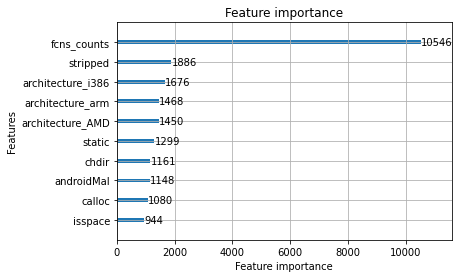

In [25]:
print('畫特徵重要性排序...')
ax = lgb.plot_importance(gbm, max_num_features=10)#max_features表示最多展示出前10個重要性特徵，可以自行設置
plt.show()